In [41]:
import pandas as pd
import numpy as np
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [18.0, 8.0]
import re
import string

In [42]:
nm_df = pd.read_pickle('speeches_nm_2019.pkl')

In [43]:
nm_df.head()

,Year,Month,Day,Title,Speech,Date,no_punct,Tokens,no_stopwords,nltk.Text
0,2019,1,18,2019\18_01_2019_PM’s address at the inaugurati...,﻿Honourable Ministers and Excellencies from va...,2019-01-18,﻿honourable ministers and excellencies from va...,"[﻿honourable, ministers, and, excellencies, fr...","[﻿honourable, ministers, excellencies, various...","(﻿honourable, ministers, excellencies, various..."
1,2019,1,19,2019\19_01_2019_PM’s speech at foundation layi...,"﻿My dear brothers and sisters \nToday, as a Pr...",2019-01-19,﻿my dear brothers and sisters today as a prime...,"[﻿my, dear, brothers, and, sisters, today, as,...","[﻿my, dear, brothers, sisters, today, prime, m...","(﻿my, dear, brothers, sisters, today, prime, m..."
2,2019,1,19,2019\19_01_2019_PM’s address at the inaugurati...,"﻿All the charioteers, superheroes associated w...",2019-01-19,﻿all the charioteers superheroes associated wi...,"[﻿all, the, charioteers, superheroes, associat...","[﻿all, charioteers, superheroes, associated, c...","(﻿all, charioteers, superheroes, associated, c..."
3,2019,1,22,2019\22_01_2019_PM's address at the 15th Prava...,"﻿Mauritius Prime Minister Your Excellency, Pra...",2019-01-22,﻿mauritius prime minister your excellency prav...,"[﻿mauritius, prime, minister, your, excellency...","[﻿mauritius, prime, minister, excellency, prav...","(﻿mauritius, prime, minister, excellency, prav..."
4,2019,1,25,2019\25_01_2019_PM’s Press Statement during st...,"﻿Your Excellency, President Ramaphosa,\nDistin...",2019-01-25,﻿your excellency president ramaphosadistinguis...,"[﻿your, excellency, president, ramaphosadistin...","[﻿your, excellency, president, ramaphosadistin...","(﻿your, excellency, president, ramaphosadistin..."


In [44]:
# Number of days in which at least one speech was given
len(nm_df.Date.unique())

28

In [45]:
nm_df['Date'].value_counts()

2019-02-15    2
2019-02-23    2
2019-02-24    2
2019-02-18    2
2019-01-27    2
2019-02-17    2
2019-02-12    2
2019-02-16    2
2019-01-19    2
2019-02-13    2
2019-02-26    2
2019-03-02    2
2019-01-22    1
2019-02-11    1
2019-03-01    1
2019-01-28    1
2019-02-03    1
2019-02-09    1
2019-02-21    1
2019-01-18    1
2019-01-31    1
2019-02-25    1
2019-01-25    1
2019-02-19    1
2019-02-07    1
2019-02-01    1
2019-02-20    1
2019-10-25    1
Name: Date, dtype: int64

In [46]:
# confirm
list(nm_df[nm_df['Date'] == '2019-02-15']['Title'])

['2019\\15_02_2019_PM’s address at dedication of various development projects in Jhansi, Uttar Pradesh.txt',
 '2019\\15_02_2019_PM’s address at the flagging off Vande Bharat Express.txt']

### Histogram of number of speeches per day

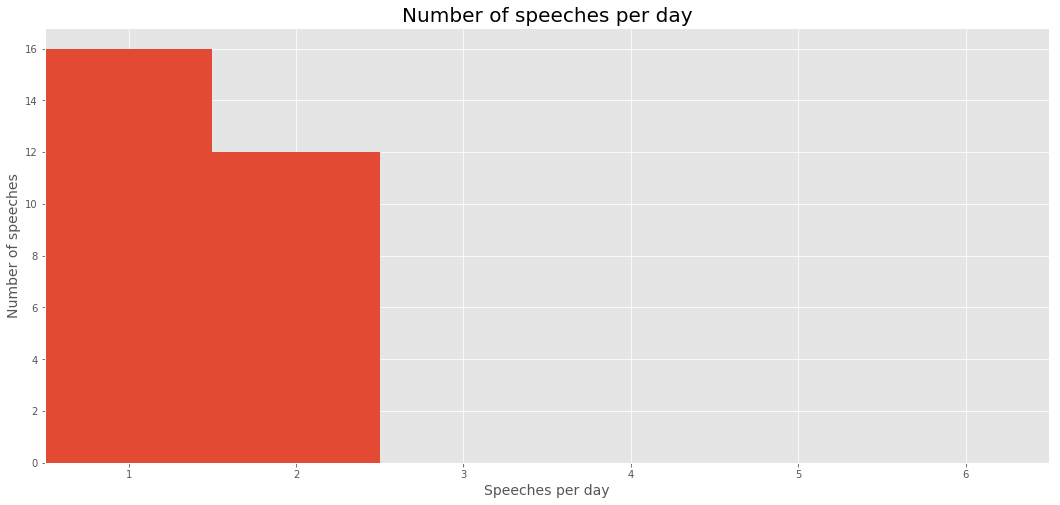

In [47]:
by_date = nm_df['Date'].value_counts()
plt.style.use('ggplot')
by_date.plot.hist(bins = range (1,5), align = 'left')
plt.xticks(range(1,8))
plt.xlim(0.5,6.5)
plt.title("Number of speeches per day", fontdict={'fontsize': 20})
plt.ylabel("Number of speeches", fontdict={'fontsize': 14})
plt.xlabel("Speeches per day", fontdict={'fontsize': 14});

In [48]:
# Removing day of the week
nm_df['Day'] = nm_df['Date'].dt.dayofweek

In [49]:
# Dictionary to label categorical variable produced by 'dayofweek' method
days = {0:'Monday',1:'Tuesday',2:'Wedsnesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

# For each value in 'Weekday', apply function that labels with corresponding name of the weekday
nm_df['Day'] = nm_df['Day'].apply(lambda x: days[x])

In [50]:
nm_df['Day'] = pd.Categorical(nm_df['Day'], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [51]:
nm_df.head()

,Year,Month,Day,Title,Speech,Date,no_punct,Tokens,no_stopwords,nltk.Text
0,2019,1,Friday,2019\18_01_2019_PM’s address at the inaugurati...,﻿Honourable Ministers and Excellencies from va...,2019-01-18,﻿honourable ministers and excellencies from va...,"[﻿honourable, ministers, and, excellencies, fr...","[﻿honourable, ministers, excellencies, various...","(﻿honourable, ministers, excellencies, various..."
1,2019,1,Saturday,2019\19_01_2019_PM’s speech at foundation layi...,"﻿My dear brothers and sisters \nToday, as a Pr...",2019-01-19,﻿my dear brothers and sisters today as a prime...,"[﻿my, dear, brothers, and, sisters, today, as,...","[﻿my, dear, brothers, sisters, today, prime, m...","(﻿my, dear, brothers, sisters, today, prime, m..."
2,2019,1,Saturday,2019\19_01_2019_PM’s address at the inaugurati...,"﻿All the charioteers, superheroes associated w...",2019-01-19,﻿all the charioteers superheroes associated wi...,"[﻿all, the, charioteers, superheroes, associat...","[﻿all, charioteers, superheroes, associated, c...","(﻿all, charioteers, superheroes, associated, c..."
3,2019,1,Tuesday,2019\22_01_2019_PM's address at the 15th Prava...,"﻿Mauritius Prime Minister Your Excellency, Pra...",2019-01-22,﻿mauritius prime minister your excellency prav...,"[﻿mauritius, prime, minister, your, excellency...","[﻿mauritius, prime, minister, excellency, prav...","(﻿mauritius, prime, minister, excellency, prav..."
4,2019,1,Friday,2019\25_01_2019_PM’s Press Statement during st...,"﻿Your Excellency, President Ramaphosa,\nDistin...",2019-01-25,﻿your excellency president ramaphosadistinguis...,"[﻿your, excellency, president, ramaphosadistin...","[﻿your, excellency, president, ramaphosadistin...","(﻿your, excellency, president, ramaphosadistin..."


In [52]:
# getting count by weekday

by_weekday = nm_df['Day'].value_counts().sortlevel()
by_weekday

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: sortlevel is deprecated, use sort_index(level=...)
  This is separate from the ipykernel package so we can avoid doing imports until


Monday       5
Tuesday      6
Wednesday    0
Thursday     3
Friday       7
Saturday     9
Sunday       7
Name: Day, dtype: int64

#### Plotting number of speeches per day of the week.

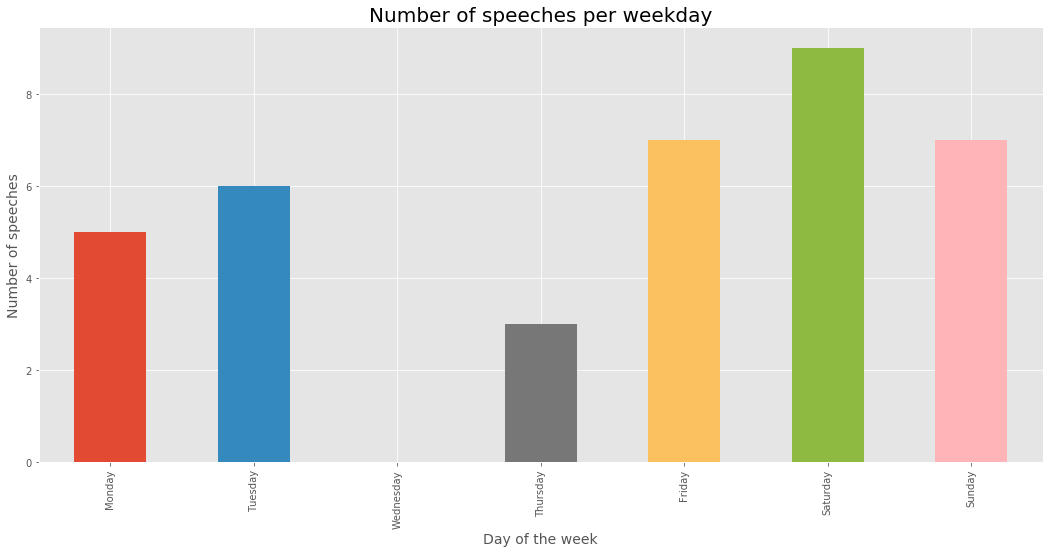

In [53]:
by_weekday.plot.bar()
plt.title("Number of speeches per weekday", fontdict={'fontsize': 20})
plt.ylabel("Number of speeches", fontdict={'fontsize': 14})
plt.xlabel("Day of the week", fontdict={'fontsize': 14});

In [54]:
by_month = nm_df['Month'].value_counts().sort_index()
by_month

1      9
2     27
3      3
10     1
Name: Month, dtype: int64

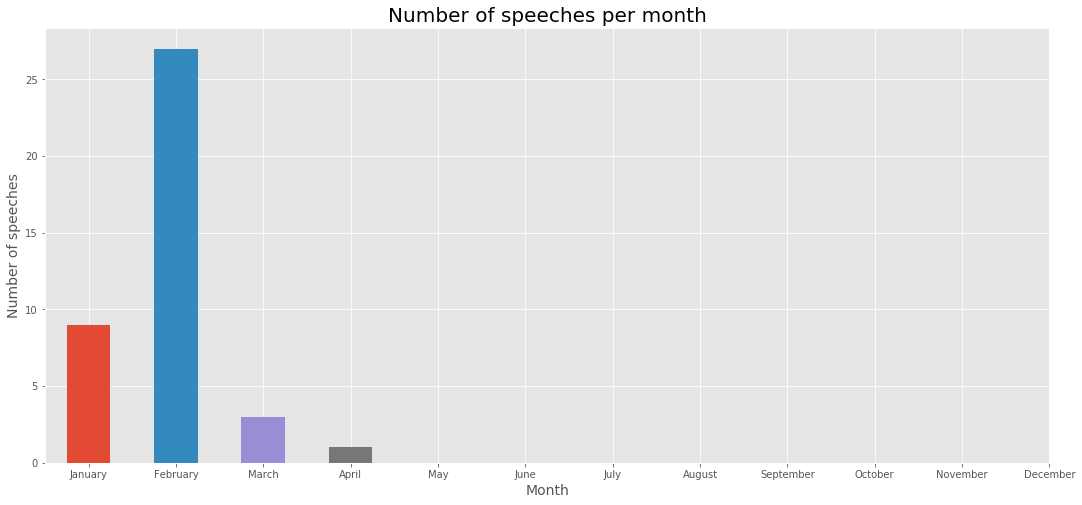

In [55]:
by_month.plot.bar()
plt.title("Number of speeches per month", fontdict={'fontsize': 20})
plt.ylabel("Number of speeches", fontdict={'fontsize': 14})
plt.xlabel("Month", fontdict={'fontsize': 14})
labels = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.xticks(range(12), labels, rotation='horizontal');

### WORD CLOUD 

In [56]:
# concatenating all the speeches in one string 
all_speeches = nm_df.Speech.str.cat(sep = ',')

In [57]:
nm_df.head()

,Year,Month,Day,Title,Speech,Date,no_punct,Tokens,no_stopwords,nltk.Text
0,2019,1,Friday,2019\18_01_2019_PM’s address at the inaugurati...,﻿Honourable Ministers and Excellencies from va...,2019-01-18,﻿honourable ministers and excellencies from va...,"[﻿honourable, ministers, and, excellencies, fr...","[﻿honourable, ministers, excellencies, various...","(﻿honourable, ministers, excellencies, various..."
1,2019,1,Saturday,2019\19_01_2019_PM’s speech at foundation layi...,"﻿My dear brothers and sisters \nToday, as a Pr...",2019-01-19,﻿my dear brothers and sisters today as a prime...,"[﻿my, dear, brothers, and, sisters, today, as,...","[﻿my, dear, brothers, sisters, today, prime, m...","(﻿my, dear, brothers, sisters, today, prime, m..."
2,2019,1,Saturday,2019\19_01_2019_PM’s address at the inaugurati...,"﻿All the charioteers, superheroes associated w...",2019-01-19,﻿all the charioteers superheroes associated wi...,"[﻿all, the, charioteers, superheroes, associat...","[﻿all, charioteers, superheroes, associated, c...","(﻿all, charioteers, superheroes, associated, c..."
3,2019,1,Tuesday,2019\22_01_2019_PM's address at the 15th Prava...,"﻿Mauritius Prime Minister Your Excellency, Pra...",2019-01-22,﻿mauritius prime minister your excellency prav...,"[﻿mauritius, prime, minister, your, excellency...","[﻿mauritius, prime, minister, excellency, prav...","(﻿mauritius, prime, minister, excellency, prav..."
4,2019,1,Friday,2019\25_01_2019_PM’s Press Statement during st...,"﻿Your Excellency, President Ramaphosa,\nDistin...",2019-01-25,﻿your excellency president ramaphosadistinguis...,"[﻿your, excellency, president, ramaphosadistin...","[﻿your, excellency, president, ramaphosadistin...","(﻿your, excellency, president, ramaphosadistin..."


In [58]:
punctuation = string.punctuation + '–¡¿”“•\r´'
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~–¡¿”“•\r´'

In [59]:
# To Strip punctuation from string 

def no_punct(string):
    transtable = string.maketrans('','', punctuation)
    return string.translate(transtable)

In [60]:
all_speeches = no_punct(all_speeches)

In [61]:
# lowercase

all_speeches = all_speeches.lower()

In [62]:
# Tokenize text
all_tokens = word_tokenize(all_speeches)

In [63]:
# eliminating stopword
def no_stopwords(tokens):
    return [w for w in tokens if w not in stopwords_eng]

In [64]:
# grab stopwords in English 

stopwords_eng = stopwords.words('english')

In [65]:
# dropping stopwords 

all_tokens = no_stopwords(all_tokens)

In [66]:
len(all_tokens)

43421

In [67]:
# see sorted frequency distribution of all tokens

most_common = nltk.FreqDist(all_tokens).most_common()

In [68]:
top = most_common[:-10]
top

[('also', 529),
 ('country', 500),
 ('people', 446),
 ('india', 425),
 ('government', 404),
 ('today', 322),
 ('years', 290),
 ('new', 270),
 ('world', 245),
 ('time', 232),
 ('work', 223),
 ('many', 219),
 ('one', 202),
 ('every', 197),
 ('farmers', 186),
 ('development', 158),
 ('come', 156),
 ('made', 156),
 ('done', 147),
 ('sisters', 140),
 ('going', 139),
 ('would', 135),
 ('first', 129),
 ('last', 125),
 ('get', 125),
 ('thousand', 125),
 ('big', 125),
 ('way', 124),
 ('lakh', 124),
 ('crore', 123),
 ('house', 122),
 ('like', 120),
 ('two', 116),
 ('rupees', 115),
 ('make', 114),
 ('scheme', 114),
 ('ji', 112),
 ('poor', 109),
 ('give', 108),
 ('given', 108),
 ('know', 106),
 ('much', 104),
 ('life', 100),
 ('four', 99),
 ('power', 94),
 ('year', 93),
 ('great', 92),
 ('used', 92),
 ('money', 92),
 ('even', 91),
 ('see', 90),
 ('started', 89),
 ('good', 89),
 ('minister', 88),
 ('us', 87),
 ('three', 83),
 ('brothers', 82),
 ('go', 82),
 ('seen', 80),
 ('become', 79),
 ('million

In [69]:
of_interest = [ "country","people","gorvernment","freedom", "democracy", "nation", "world",
    "environment", "oil", "soil", "jobs", "education", "employment", "security",
    "terrorism", "pakistan", "china", "russia", "america", "terrorist", "gst", "pulwama",
    "surgical", "smart", "growth", "strike", "kashmir","violence", "rahul", "money", "election", "friends", "backward",
    "gujarat", "suicide","farmers", "development", "startup", "healthcare", "kisan","tourism", "army","corruption"        ]

In [70]:
len(of_interest)

43

In [71]:
# fitering list of all the tokens based on the list of words of interest

tokens_of_interest = [w for w in all_tokens if w in of_interest]
tokens_of_interest_str = ' '.join(tokens_of_interest)
# writing it down to a text file
with open('A://Data Analysis Jupyter//Campaign-Analytics//Word-Cloud//tokens_of_interest_str.txt', 'a') as f:
    f.write(tokens_of_interest_str)
fdist = nltk.FreqDist(tokens_of_interest)
fdist.most_common()

[('country', 500),
 ('people', 446),
 ('world', 245),
 ('farmers', 186),
 ('development', 158),
 ('money', 92),
 ('security', 45),
 ('gujarat', 42),
 ('employment', 41),
 ('nation', 38),
 ('growth', 34),
 ('corruption', 33),
 ('friends', 32),
 ('freedom', 31),
 ('democracy', 30),
 ('election', 30),
 ('army', 30),
 ('tourism', 29),
 ('education', 28),
 ('kisan', 28),
 ('environment', 25),
 ('jobs', 18),
 ('smart', 15),
 ('gst', 15),
 ('pulwama', 12),
 ('terrorism', 11),
 ('healthcare', 9),
 ('startup', 8),
 ('surgical', 7),
 ('soil', 6),
 ('kashmir', 6),
 ('terrorist', 6),
 ('oil', 5),
 ('strike', 5),
 ('pakistan', 4),
 ('backward', 3),
 ('suicide', 1),
 ('rahul', 1),
 ('america', 1),
 ('russia', 1),
 ('violence', 1)]

## WORD-CLOUD

In [72]:
from os import path 
from PIL import Image 
from wordcloud import WordCloud, STOPWORDS

In [73]:
d = path.dirname('A://Data Analysis Jupyter//Campaign-Analytics//Word-Cloud//tokens_of_interest_str.txt')

In [74]:
# reading the whole text 
text =  open(path.join(d, 'tokens_of_interest_str.txt')).read()

In [75]:
# read the outline image
india_base = np.array(Image.open(path.join(d, "A://Data Analysis Jupyter//Campaign-Analytics//Word-Cloud//india_mask1.jpg")))

In [76]:
stopwords = set(STOPWORDS)

In [77]:
wc = WordCloud(background_color = "white", max_words = 2500, mask = india_base,
              stopwords = stopwords, contour_width = 3, contour_color = 'steelblue')

In [78]:
wc.generate(text)

In [79]:
wc.to_file(path.join(d, "wordcloud.png"))

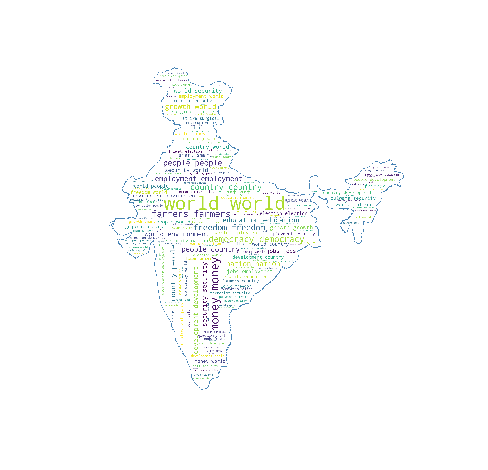

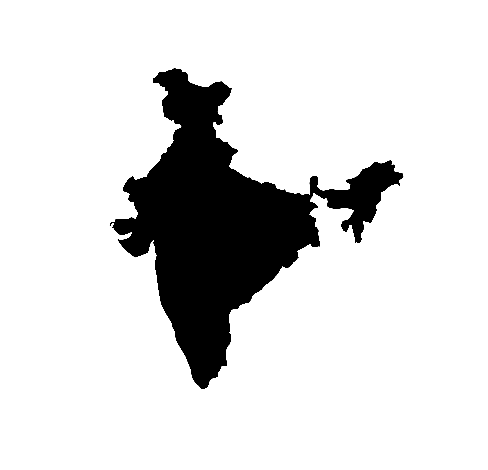

In [80]:
plt.imshow(wc)
plt.axis("off")
plt.figure()
plt.imshow(india_base, cmap = plt.cm.gray)
plt.axis("off")
plt.show()